# Satellite basemaps with plotly

In [30]:
# import libraries
import geopandas as gpd
import pandas as pd
import numpy

# for interactive plots
import plotly.express as px
import matplotlib.pyplot as plt


For this session, census block group data for Philadelphia was acquired from [census reporter](https://censusreporter.org/data/table/?table=B03002&geo_ids=05000US42101,150|05000US42101&primary_geo_id=05000US42101)

In [49]:
# read in geojson file of census block groups
gdf = gpd.read_file('acs2021_5yr_B03002_15000US421010007022/acs2021_5yr_B03002_15000US421010007022.geojson')

In [57]:
# data acquired from census reporter includes first row summary of entire county, which needs to be deleted
gdf = gdf.drop([0])

<AxesSubplot: >

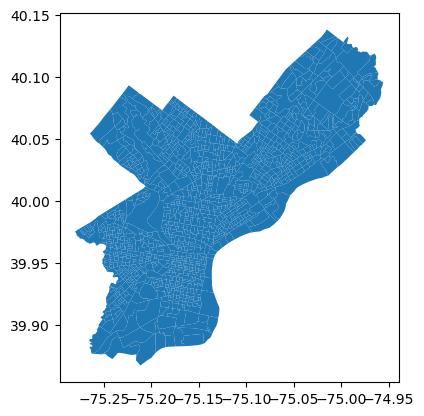

In [58]:
# quick visual check
gdf.plot()

In order to use mapbox satellite imagery, you have to [create an account](https://account.mapbox.com/auth/signup/) with them and acquire a token. Once you have a token, enter it in the cell below:

In [59]:
# set the mapbox access token
token = ''
px.set_mapbox_access_token(token)

Plotly maps require center lat/lon's. You can enter it manually if you know the lat/lon center point of your desired map, or calculate it based on the data layer you are mapping.

In [60]:
# extract center point
center_lon = gdf.dissolve().centroid.x.values[0]
center_lat = gdf.dissolve().centroid.y.values[0]

/var/folders/09/7rqr2q_j5z180q4m1333f_qm0000gp/T/ipykernel_83748/1486359981.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/09/7rqr2q_j5z180q4m1333f_qm0000gp/T/ipykernel_83748/1486359981.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Documentation on the `choropleth_mapbox` arguments can be found [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth_mapbox.html). They are pretty tricky, so here's a summary:

- `geojson` is the `geometry` column of the geodataframe you are mapping. So generally, this would be `gdf.geometry`
- `location` is the index field of your gdf which is: `gdf.index`
- `zoom` is not automatically determined. Just play with the numbers (0 is the entire world, 20 is about the size of a single house) to get the right fit.
- `color` you can designate a field that you have joined (such as population or poverty) to make the map a choropleth map. As an example, this map uses `B03002004` which according to the metadata is 'Black or African American alone'

In [65]:
fig = px.choropleth_mapbox(gdf, 
                     geojson=gdf.geometry, 
                     locations=gdf.index, 
                     mapbox_style="satellite-streets",
                     zoom=10, 
                     height=800,
                     width=1000,
                     color='B03002004',  
                     center = {"lat": center_lat, "lon": center_lon},
                     opacity=0.4,
                     title='Philadelphia Black or African American alone',
                     labels={
                        'B03002004': 'Count of Black or African Americans'
                     })

fig.update_traces(marker_line_width=0.5,marker_line_color='white')